In [58]:
import scan, simulate_data

In [59]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

In [60]:
params = {
    'M':1,
    'N':60,
    'D':71,
    'T':10000,
    'seed':1,
    'SM_repetitions':5,
    'spikes_in_SM':8,
    'noise':5000
}

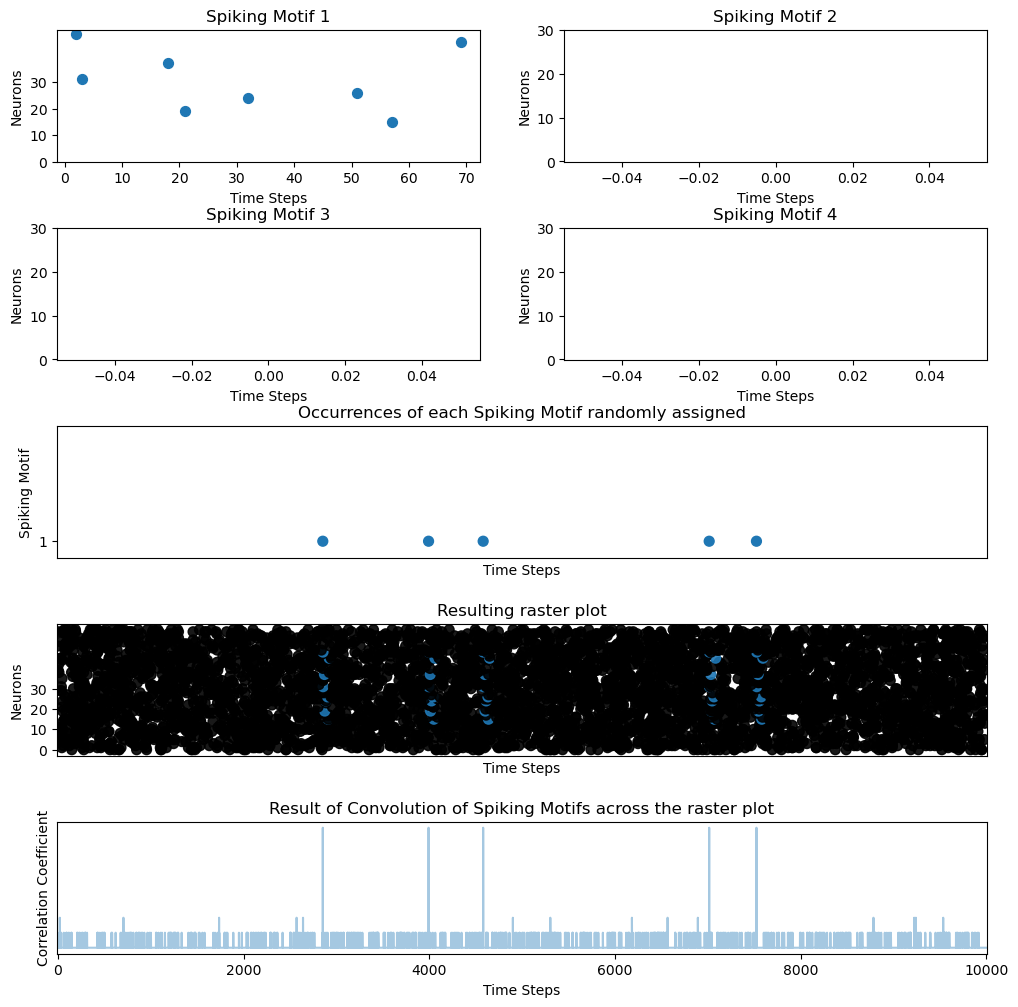

In [61]:
A_dense, A_sparse, B_dense, B_sparse, K_dense, K_sparse = simulate_data.generate_synthetic_data(params, plot=True)

In [62]:
pattern_template, all_times, window_time, cluster_time, sequence_time = scan.scan_raster(A_sparse[1],A_sparse[0])

5040 Windows


438 patterns found..... 100%10.01 | opt_cutoff - 1.37 | most_detections - 4etections - 4


In [63]:
def get_imgs(N, pattern_template):
    if len(pattern_template) == 0:
        print('FAIL')
        return pattern_template, None
    
    win_size = (N,1+max([max(k[:,0]) for k in pattern_template]))
    pattern_img = np.zeros((len(pattern_template),*win_size))
    for p,pattern in enumerate(pattern_template):
        for (i,j) in pattern:
            pattern_img[p,j,i] = 1
            
    pattern_img = pattern_img.transpose((1,2,0))
    
    return pattern_template, pattern_img

In [67]:
times, units = A_sparse[0], A_sparse[1]

In [68]:
pattern_template_copy, pattern_img = get_imgs(1+max(units.astype('int')),pattern_template)

raster = np.zeros((max((times).astype('int'))+1, 1+max(units)))
print(raster.shape, pattern_img.shape)
for i in range(len(times)):
    raster[int(times[i]),units[i]]=1
print('done')

D_ = pattern_img.shape[1]
sanity_check = np.zeros((raster.shape[0],pattern_img.shape[2]))
for j in tqdm(range(pattern_img.shape[2])):
    for i in range(raster.shape[0]-D_):
        sanity_check[i,j] = np.sum(pattern_img[...,j]*raster.T[:,i:i+D_])
    sanity_check[:,j] = sanity_check[:,j]/np.max(sanity_check[:,j])

MemoryError: Unable to allocate 12.1 GiB for an array with shape (438, 9997, 372) and data type float64

In [87]:
def sparse_convolution(spikes,labels, pattern_):
    # Extract unique channels from the pattern
    pattern = pattern_.copy()
    filt_labels = pattern.T[1]
    filt_spikes = spikes[np.isin(labels, filt_labels)]
    filt_labels = labels[np.isin(labels, filt_labels)]
    set_raster = set([(a,b) for a,b in zip(filt_spikes,filt_labels)])
    out = np.zeros((1+np.max(spikes)))
    t=0
    while t <= (np.max(spikes)):
        pattern.T[0]+=1
        set_pattern = set([tuple(k) for k in pattern])
        out[t] = len(set_pattern.intersection(set_raster))/len(set_pattern)
        t+=1
                
    return out



In [104]:
len(A_sparse[1])

5040

In [88]:
sanity_check = []
for k in tqdm(pattern_template):
    sanity_check.append(sparse_convolution(A_sparse[1],A_sparse[0], k))

100%|████████████████████████████████████████████████████████████████████████████████| 438/438 [03:53<00:00,  1.87it/s]


In [107]:
counts = np.array([list(np.where(sanity_check==1)[1]).count(k) for k in np.unique(np.where(sanity_check==1)[1])])
patterns = np.unique(np.where(sanity_check==1)[1])
pattern_template = np.array(pattern_template,dtype='object')
np.array(patterns[counts>=3]), np.array(counts[counts>=3]), np.array([len(k) for k in pattern_template[patterns[counts>=3]]])

(array([227, 283, 403], dtype=int64), array([5, 4, 4]), array([8, 2, 2]))

In [111]:
patterns[counts>=3]

array([227, 283, 403], dtype=int64)

In [92]:
sanity_check = np.array([k for k in (sanity_check)])

In [106]:
sanity_check.shape

(9997, 438)

In [95]:

sanity_check = sanity_check.T

In [96]:
sanity_check.shape

(9997, 438)

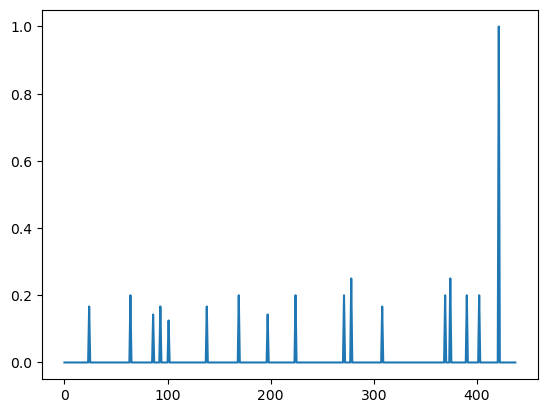

In [102]:
plt.figure()
plt.plot(sanity_check[0])
plt.show()

In [99]:
sanity_check.shape


(9997, 438)

In [101]:
for i in range(len(pattern_template)):
    sanity_check[:,i]/= len(pattern_template[i])

In [ ]:
pattern_template, all_times, window_time, cluster_time, sequence_time = scan.scan_raster(A_sparse[1],A_sparse[0])